##### Classification Evaluation Metrics

    -   Binary Classification
        -   Yes/No
        -   True/False
        -   High/Low
    
    -   Non Binary Classification / Multi Class Classification
        -   Small , medium , large
        -   far , near , far away

-   Models preferred for Binary Classification 
    -   Naive Bayes
    -   Logistic Regression
    -   KNN
    -   SVM - support vector machine
    -   Decision Tree
    -   Random Forest

-   Models for Multi Class Classification
    -   Naive Bayes
    -   Gradient Boosting
    -   KNN
    -   Decision Tree
    -   Random Forest

    -   Accuracy
    -   Precision
    -   Recall
    -   F1 score
    -   Confusion matrix

In [55]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


In [56]:
data = pd.DataFrame({
    'age':[30,20,45,62,14,54,56,71,25,63,49,85,74,16,19,18,25,56,45,25],
    'bp':[130,120,145,162,114,154,156,171,125,163,149,185,174,116,119,118,125,156,145,125],
    'cholestrol':[230,220,245,262,214,254,256,271,225,263,249,285,274,216,219,218,225,256,245,225],
    'label':[1,0,1,0,1,0,1,1,0,1,0,0,1,0,1,0,0,1,1,1]
})

In [57]:
data.head()

,age,bp,cholestrol,label
0,30,130,230,1
1,20,120,220,0
2,45,145,245,1
3,62,162,262,0
4,14,114,214,1


In [58]:
xtrain,xtest,ytrain,ytest = train_test_split(data[['age','bp','cholestrol']],data['label'],test_size = 0.2, random_state = 42)

In [59]:
clf = LogisticRegression(random_state = 42)
clf.fit(xtrain,ytrain)

LogisticRegression(random_state=42)

In [60]:
ypred = clf.predict(xtest)

In [61]:
ypred = np.array(ypred)
ytest = np.array(ytest)

In [62]:
ypred

array([1, 1, 1, 1], dtype=int64)

In [63]:
ytest

array([1, 1, 0, 0], dtype=int64)

    True positive - TP - ypred is 1 and my ytest is also 1
    True negative - TN - ypred is 0 and ytest is also 0
    False Positive - FP - ypred is 1 and ytest is 0
    False Negative - FN - ypred is 0 and ytest is 1

In [64]:
# Accuracy - not ideal for imbalanced dataset
# (TN+TP)/(TN+TP+FP+FN)'''
# Precision - ideally should be 1 or near to 1 for a good model/classifier.. false positive is near to 0 or 0
# TP/(TP+FP)'''
# Recall - ideally should be or near to 1 ,... false negative is near to 0 or 0 itself
# TP/(TP+FN)'''
# f1 score - harmoniv mean between precision and recall 
# 2*((precision*recall)/(precision+recall))'''

In [65]:
TP = 0
FP = 0
TN = 0
FN = 0
for i in range(len(ypred)):
    if ypred[i] == ytest[i] == 1:
        TP+= 1
    elif ypred[i] == ytest[i] == 0:
        TN+= 1
    elif ypred[i] == 1 and ytest[i] == 0:
        FP+= 1
    elif ypred[i] == 0 and ytest[i] == 1:
        FN+= 1

In [66]:
print(f"true positive is {TP}")
print(f"true negative is {TN}")
print(f"false positive is {FP}")
print(f"false negative is {FN}")

true positive is 2
true negative is 0
false positive is 2
false negative is 0


In [67]:
accuracy_1 = (TN+TP)/(TN+TP+FN+FP)
accuracy_sk = metrics.accuracy_score(ytest,ypred)

In [68]:
print(accuracy_sk)

0.5


In [69]:
precision_1 = TP/(FP+TP)
precision_sk = metrics.precision_score(ytest,ypred)


In [70]:
print(precision_sk)

0.5


In [71]:
# Recall
# sensitivity - of all +ve what percentage predicted postive - TP/(TP+FN)
# specificity - of all -ve what percentage predicted negative - TN/(TN+FP)

recall_sen = TP/(TP+FN)
recall_sen_sk = metrics.recall_score(ytest,ypred)
recall_spe = TN/(TN+FP)
recall_spe_sk = metrics.recall_score(ytest,ypred, pos_label = 0)

In [72]:
print(recall_spe)

0.0


In [73]:
cm = metrics.confusion_matrix(ytest,ypred)
print(cm)

[[0 2]
 [0 2]]


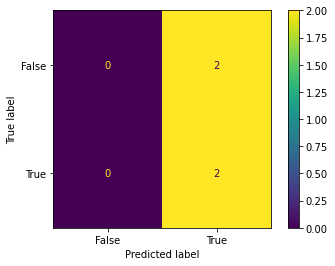

In [74]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = [False,True])
cm_display.plot()
plt.show()